In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory+
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


This is a very beginner friendly kernel and my first kernel . I hope it helps you as much as i learned while implementing it , So lets Begin.

Notebooks that helped me , please give them a read .
https://www.kaggle.com/poonaml/deep-neural-network-keras-way#Import-all-required-libraries

In [2]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from keras.utils import to_categorical
from keras.layers import *
from sklearn.model_selection import StratifiedShuffleSplit 
import numpy as np
from keras.preprocessing import image

We begin by importing libraries that i would use generally. Also i would recommend all beginners to keep all their imports at one place for ease and presentation wise too .

In [3]:
def load_data():
    path = '/kaggle/input/digit-recognizer/'
    train = pd.read_csv(path+'train.csv')
    test = pd.read_csv(path+'test.csv')
    train_X,train_y = train.drop(columns=['label']),train['label']
    train_X = np.array(train_X)
    
    train_y = np.array(train_y)
    
    test_X = test
    test_X = np.array(test_X)
    print(train_X.shape)
    train_X = train_X.reshape((train_X.shape[0],28,28,1))
    print(train_X.shape)
    test_X = test_X.reshape((test_X.shape[0],28,28,1))
    train_y = to_categorical(train_y)
    return train_X, train_y,test_X
def normalize(trainX,testX):
    trainX_trans = trainX / 255
    testX_trans = testX / 255
    return trainX_trans,testX_trans
def make_model():
    keras.backend.clear_session()
    model = keras.models.Sequential()
    model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',input_shape=(28,28,1),padding='same'))
    model.add(MaxPooling2D((2, 2)))
    ##
    model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
    model.add(MaxPooling2D((2, 2)))
    ###
    model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
    model.add(Flatten())
    model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer = 'RMSprop',loss='categorical_crossentropy',metrics=['accuracy'])
    return model

    


I have made functions that will help me load my data , normalise it , use encoding . So that i dont have to do same thing over and over again . This practise helped me to monitor more things at once and keep my code clean.

The load data function simply loads the dataset. 

I also reshaped the dataset's (which was converted into numpy array as they are fast and easy to deal) each sameple from 784 into 28 x 28 x 1 shape. For those who dont know the reason for this step can look at this article which exlain in detail and other details about convulotion layer.
https://towardsdatascience.com/applied-deep-learning-part-4-convolutional-neural-networks-584bc134c1e2

I used to_categorical to implement one hot encoding in my labels .(It made 3 to a array (0,0,0,1,0,0,0,0,0,0) ).

And Normalize function normalizes the image pixels , as the value of pixels can be from 0 to 255.(I Reduced it to 0 to 1.This step was important and it did increase my score in the leader board).

Make model created a model and returned it . The model i used was a simple convnet with 3 Conv2D layers ,1 Dense layer ,2 Max Pooling layer and a Dense layer for showing probabiliy of being the digit (Hence it outputs an array of size 10,probability for each).

Optimizer is the common RMSprop one can try SGD too.Loss function is crosscategorical_crossentropy which is best suited for such conditions and accuracy as metrics to monitor performance of my model.



In [4]:
trainX, trainy,testX = load_data()
trainX,testX = normalize(trainX,testX)
model = make_model()
model.summary()

(42000, 784)
(42000, 28, 28, 1)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)           

In [5]:
score_acc = []
score_loss = []
score_val_loss = []
score_val_accuracy = []
sss = StratifiedShuffleSplit(20,test_size=.2,random_state=115)
for index, (train_indices, val_indices) in enumerate(sss.split(trainX,trainy)):
    print(len(train_indices))
    his = model.fit(trainX[train_indices],trainy[train_indices],validation_data=(trainX[val_indices],trainy[val_indices]),epochs=1,batch_size=512)
    score_acc.append(his.history['accuracy'])
    score_loss.append(his.history['loss'])
    score_val_loss.append(his.history['val_loss'])
    score_val_accuracy.append(his.history['val_accuracy'])


33600
66/66 [==============================] - 1s 15ms/step - loss: 0.6528 - accuracy: 0.8186 - val_loss: 0.1614 - val_accuracy: 0.9496
33600
66/66 [==============================] - 1s 11ms/step - loss: 0.1104 - accuracy: 0.9662 - val_loss: 0.0703 - val_accuracy: 0.9783
33600
66/66 [==============================] - 1s 11ms/step - loss: 0.0607 - accuracy: 0.9805 - val_loss: 0.0894 - val_accuracy: 0.9727
33600
66/66 [==============================] - 1s 11ms/step - loss: 0.0427 - accuracy: 0.9862 - val_loss: 0.0579 - val_accuracy: 0.9844
33600
66/66 [==============================] - 1s 11ms/step - loss: 0.0324 - accuracy: 0.9898 - val_loss: 0.0334 - val_accuracy: 0.9900
33600
66/66 [==============================] - 1s 11ms/step - loss: 0.0242 - accuracy: 0.9929 - val_loss: 0.0140 - val_accuracy: 0.9955
33600
66/66 [==============================] - 1s 12ms/step - loss: 0.0197 - accuracy: 0.9935 - val_loss: 0.0185 - val_accuracy: 0.9936
33600
66/66 [==============================] - 1

Instead of running a simple model.fit ,I used Stratified Shuffle Split for 2 reasons:-
1. It divides the data properly , assume i have 50 images of cat and dogs. And i decided to use 50 for training ,25 for validation and 25 for testing . There is no way to tell if 50 training images are of 25 cats and dog each .Maybe its 40 cats and 10 dogs ,Surely this is a problem as it wont be truly proportional sample. This problem is taken care by Stratified Shuffle Split .

2. I got better score using this method.POINT BLANK.

(0.0, 20.0, 0.96, 1.05)

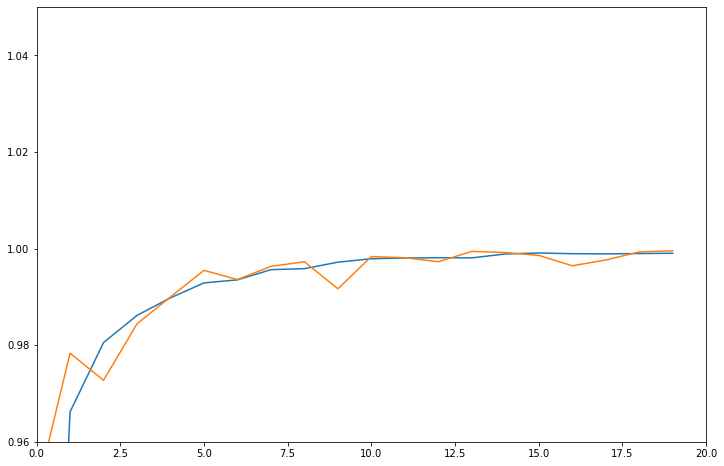

In [6]:
plt.figure(figsize=(12,8))
plt.plot(score_acc)
plt.plot(score_val_accuracy)
plt.axis([0,20,.96,1.05])

In [7]:
pred = np.argmax(model.predict(testX),axis=1)

In [8]:
pred = pd.DataFrame(pred,columns=['Label'])
xyz = pd.DataFrame(np.arange(1,testX.shape[0]+1),columns=['ImageId'])

pred = pd.concat([xyz,pred],axis=1)
pred.to_csv('CONV 2D.csv',index=False)

The model above gave me a good 99. something accuracy which i was suprised to see as which my normal Nueral network i got 97. something at max.
I would like the readers who are starting in kaggle to learn more about Convulation Network as it blew me away. I was reluctant to use it as i thought of it as some advanced topic and kept on delaying to learn it .I wish you would not make the same mistake as me.

AUGMENTATION

Now i read about data augmentation and this was easy to understand but i was dumbstruck on how to use it and keras documentaion did help me.
If you are hearing about Data Augmentation for first time , please go through the link to get an Idea about this and i Promise you will love it.
https://www.analyticsvidhya.com/blog/2020/08/image-augmentation-on-the-fly-using-keras-imagedatagenerator/

This was just a rough code as i wanted to see the images it generated .Curiousity got the best of me.

In [9]:
trainX, trainy,testX = load_data()
trainX,testX = normalize(trainX,testX)
model = make_model()
model.summary()

(42000, 784)
(42000, 28, 28, 1)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)           

In [10]:
datagen = image.ImageDataGenerator()

In [11]:

score_acc = []
score_loss = []
score_val_loss = []
score_val_accuracy = []
sss = StratifiedShuffleSplit(10,test_size=.2,random_state=115)
for index, (train_indices, val_indices) in enumerate(sss.split(trainX,trainy)):
    aa = trainX[train_indices]
    ab = trainy[train_indices]
    cc = trainX[val_indices]
    cd = trainy[val_indices]
    training_batch = datagen.flow(aa, ab, batch_size=512)
    val_batches = datagen.flow(cc, cd, batch_size=128)
    his = model.fit_generator(generator=training_batch, steps_per_epoch=512, epochs=1, 
                    validation_data=val_batches, validation_steps=128)
    score_acc.append(his.history['accuracy'])
    score_loss.append(his.history['loss'])
    score_val_loss.append(his.history['val_loss'])
    score_val_accuracy.append(his.history['val_accuracy'])


 66/512 [==>...........................] - 1s 16ms/step - loss: 0.0090 - accuracy: 0.9972 - val_loss: 0.0060 - val_accuracy: 0.9982


In [12]:
model.evaluate(trainX,trainy)

1313/1313 [==============================] - 3s 3ms/step - loss: 0.0045 - accuracy: 0.9987


[0.004490276798605919, 0.99871426820755]

In [13]:
pred = np.argmax(model.predict(testX),axis=1)
pred = pd.DataFrame(pred,columns=['Label'])
xyz = pd.DataFrame(np.arange(1,testX.shape[0]+1),columns=['ImageId'])

pred = pd.concat([xyz,pred],axis=1)
pred.to_csv('DATA AUG.csv',index=False)
model.save('DATA AUG.h5')

You will see that i save my files in csv and their names might be a bit confusing but i do this to keep track of what i did to get the results like data aug means i added augmentation to my code of data .It is a little unorthodox but i will make sure to find better way.

I used GPU for these fittings and it saved me hours of time .Hatsoff to kaggle GPU for this , i would also suggest you to learn how to use it as it will help to make your code execute faster but only if you are training deep Networks.

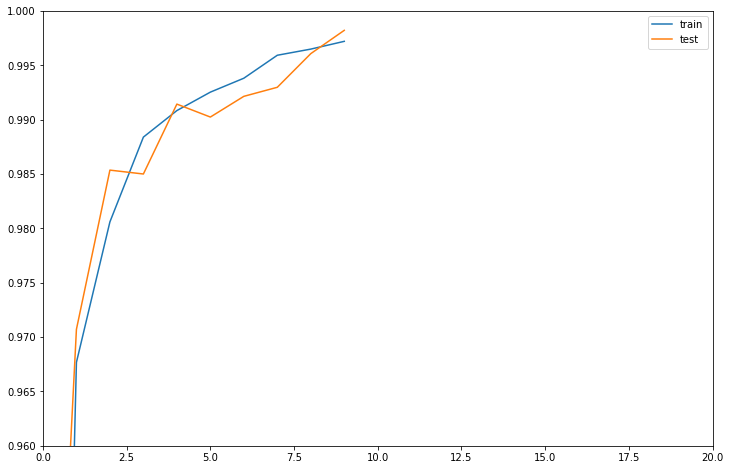

In [14]:
plt.figure(figsize=(12,8))
plt.plot(score_acc,label='train')
plt.plot(score_val_accuracy,label='test')
plt.axis([0,20,.96,1.])
plt.legend()

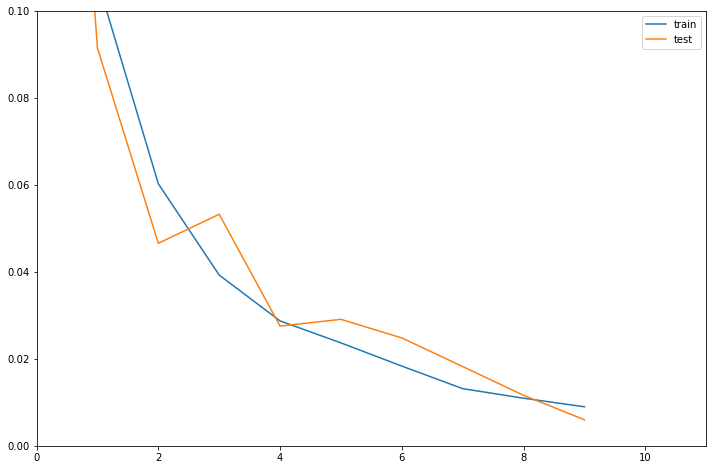

In [15]:
plt.figure(figsize=(12,8))
plt.plot(score_loss,label='train')
plt.plot(score_val_loss,label='test')
plt.axis([0,11,.0,.1])
plt.legend()

Some plots to see the performance of my model.

In [16]:

score_acc = []
score_loss = []
score_val_loss = []
score_val_accuracy = []
sss = StratifiedShuffleSplit(20,test_size=.2,random_state=115)
for index, (train_indices, val_indices) in enumerate(sss.split(trainX,trainy)):
    aa = trainX[train_indices]
    ab = trainy[train_indices]
    cc = trainX[val_indices]
    cd = trainy[val_indices]
    training_batch = datagen.flow(aa, ab, batch_size=512)
    val_batches = datagen.flow(cc, cd, batch_size=128)
    his = model.fit_generator(generator=training_batch, steps_per_epoch=512, epochs=1, 
                    validation_data=val_batches, validation_steps=128)
    score_acc.append(his.history['accuracy'])
    score_loss.append(his.history['loss'])
    score_val_loss.append(his.history['val_loss'])
    score_val_accuracy.append(his.history['val_accuracy'])


 66/512 [==>...........................] - 1s 16ms/step - loss: 0.0020 - accuracy: 0.9995 - val_loss: 0.0017 - val_accuracy: 0.9994


In [17]:
pred = np.argmax(model.predict(testX),axis=1)
pred = pd.DataFrame(pred,columns=['Label'])
xyz = pd.DataFrame(np.arange(1,testX.shape[0]+1),columns=['ImageId'])

pred = pd.concat([xyz,pred],axis=1)
pred.to_csv('DATA AUG_size.csv',index=False)
model.save('DATA AUG_size.h5')

Here i increase number of splits as data aug do generate more than one image by altering it so i increased the splits,also i could see that it was not reaching upto its true potential.

In [18]:
def make_model():
    keras.backend.clear_session()
    model = keras.models.Sequential()
    model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',input_shape=(28,28,1),padding='same'))
    model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
    model.add(MaxPooling2D((2, 2)))
    ##
    model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
    model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
    model.add(MaxPooling2D((2, 2)))
    ###
    model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
    model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Flatten())
    model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer = 'RMSprop',loss='categorical_crossentropy',metrics=['accuracy'])
    return model
trainX, trainy,testX = load_data()
trainX,testX = normalize(trainX,testX)
model = make_model()
model.summary()
score_acc = []
score_loss = []
score_val_loss = []
score_val_accuracy = []
sss = StratifiedShuffleSplit(10,test_size=.2,random_state=115)
for index, (train_indices, val_indices) in enumerate(sss.split(trainX,trainy)):
    aa = trainX[train_indices]
    ab = trainy[train_indices]
    cc = trainX[val_indices]
    cd = trainy[val_indices]
    training_batch = datagen.flow(aa, ab, batch_size=512)
    val_batches = datagen.flow(cc, cd, batch_size=128)
    his = model.fit_generator(generator=training_batch, steps_per_epoch=512, epochs=1, 
                    validation_data=val_batches, validation_steps=128)
    score_acc.append(his.history['accuracy'])
    score_loss.append(his.history['loss'])
    score_val_loss.append(his.history['val_loss'])
    score_val_accuracy.append(his.history['val_accuracy'])


(42000, 784)
(42000, 28, 28, 1)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)       

In [19]:
model.evaluate(trainX,trainy)

1313/1313 [==============================] - 3s 3ms/step - loss: 0.0100 - accuracy: 0.9967


[0.010028245858848095, 0.996738076210022]

In [20]:
pred = np.argmax(model.predict(testX),axis=1)
pred = pd.DataFrame(pred,columns=['Label'])
xyz = pd.DataFrame(np.arange(1,testX.shape[0]+1),columns=['ImageId'])

pred = pd.concat([xyz,pred],axis=1)
pred.to_csv('DATA AUG_size_arch.csv',index=False)
model.save('DATA AUG_size_arch.h5')

Now that i was in zone and read about VGG 16 please look into it if you have not and i saw the architecture / layers layout they used and i tried to give it a chance . This did certainly help me get past 99.2 accuracy and break my own record.

In [21]:
datagen = image.ImageDataGenerator(featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2)
def make_model():
    keras.backend.clear_session()
    model = keras.models.Sequential()
    model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',input_shape=(28,28,1),padding='same'))
    model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
    model.add(MaxPooling2D((2, 2)))
    ##
    model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
    model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
    model.add(MaxPooling2D((2, 2)))
    ###
    model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
    model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Flatten())
    model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer = 'RMSprop',loss='categorical_crossentropy',metrics=['accuracy'])
    return model
trainX, trainy,testX = load_data()
trainX,testX = normalize(trainX,testX)
model = make_model()
model.summary()
score_acc = []
score_loss = []
score_val_loss = []
score_val_accuracy = []
sss = StratifiedShuffleSplit(10,test_size=.2,random_state=115)
for index, (train_indices, val_indices) in enumerate(sss.split(trainX,trainy)):
    aa = trainX[train_indices]
    ab = trainy[train_indices]
    cc = trainX[val_indices]
    cd = trainy[val_indices]
    training_batch = datagen.flow(aa, ab, batch_size=512)
    val_batches = datagen.flow(cc, cd, batch_size=128)
    his = model.fit_generator(generator=training_batch, steps_per_epoch=512, epochs=1, 
                    validation_data=val_batches, validation_steps=128)
    score_acc.append(his.history['accuracy'])
    score_loss.append(his.history['loss'])
    score_val_loss.append(his.history['val_loss'])
    score_val_accuracy.append(his.history['val_accuracy'])


(42000, 784)
(42000, 28, 28, 1)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)       

/opt/conda/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/opt/conda/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


 66/512 [==>...........................] - 9s 132ms/step - loss: 0.0463 - accuracy: 0.9857 - val_loss: 0.0445 - val_accuracy: 0.9863


In [22]:
model.evaluate(trainX,trainy)

1313/1313 [==============================] - 4s 3ms/step - loss: 0.0385 - accuracy: 0.9876


[0.03851128742098808, 0.9876190423965454]

In [23]:
pred = np.argmax(model.predict(testX),axis=1)
pred = pd.DataFrame(pred,columns=['Label'])
xyz = pd.DataFrame(np.arange(1,testX.shape[0]+1),columns=['ImageId'])

pred = pd.concat([xyz,pred],axis=1)
pred.to_csv('DATA AUG_size_arch_custom_gen.csv',index=False)
model.save('DATA AUG_size_arch_custom_gen.h5')

I thought to add some customizations to my Image generator , in order to give my score a push . I used the dafault example given in keras documentation .
https://keras.io/api/preprocessing/image/#imagedatagenerator-class

In [24]:
datagen = image.ImageDataGenerator(featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2)
def make_model():
    keras.backend.clear_session()
    model = keras.models.Sequential()
    model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',input_shape=(28,28,1),padding='same'))
    model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
    model.add(MaxPooling2D((2, 2)))
    ##
    model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
    model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
    model.add(MaxPooling2D((2, 2)))
    ###
    model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
    model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Flatten())
    model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer = 'RMSprop',loss='categorical_crossentropy',metrics=['accuracy'])
    return model
trainX, trainy,testX = load_data()
trainX,testX = normalize(trainX,testX)
model = make_model()
model.summary()
score_acc = []
score_loss = []
score_val_loss = []
score_val_accuracy = []
sss = StratifiedShuffleSplit(20,test_size=.2,random_state=115)
for index, (train_indices, val_indices) in enumerate(sss.split(trainX,trainy)):
    aa = trainX[train_indices]
    ab = trainy[train_indices]
    cc = trainX[val_indices]
    cd = trainy[val_indices]
    training_batch = datagen.flow(aa, ab, batch_size=512)
    val_batches = datagen.flow(cc, cd, batch_size=128)
    his = model.fit_generator(generator=training_batch, steps_per_epoch=512, epochs=1, 
                    validation_data=val_batches, validation_steps=128)
    score_acc.append(his.history['accuracy'])
    score_loss.append(his.history['loss'])
    score_val_loss.append(his.history['val_loss'])
    score_val_accuracy.append(his.history['val_accuracy'])


(42000, 784)
(42000, 28, 28, 1)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)       

/opt/conda/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/opt/conda/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


 66/512 [==>...........................] - 9s 138ms/step - loss: 0.0265 - accuracy: 0.9913 - val_loss: 0.0504 - val_accuracy: 0.9837


In [25]:
model.evaluate(trainX,trainy)

1313/1313 [==============================] - 4s 3ms/step - loss: 0.0230 - accuracy: 0.9923


[0.023048067465424538, 0.9923095107078552]

In [26]:
pred = np.argmax(model.predict(testX),axis=1)
pred = pd.DataFrame(pred,columns=['Label'])
xyz = pd.DataFrame(np.arange(1,testX.shape[0]+1),columns=['ImageId'])

pred = pd.concat([xyz,pred],axis=1)
pred.to_csv('DATA AUG_size_arch_custom_gen_20.csv',index=False)
model.save('DATA AUG_size_arch_custom_gen_20.h5')

I thought it was not running my model enough as it was kind of underfiting so i changed it to 20 splits.

In [27]:
datagen = image.ImageDataGenerator(featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2)
def make_model():
    keras.backend.clear_session()
    model = keras.models.Sequential()
    model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',input_shape=(28,28,1),padding='same'))
    model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
    model.add(MaxPooling2D((2, 2)))
    ##
    
    ##
    model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
    model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
    model.add(MaxPooling2D((2, 2)))
    ###
    model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
    model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Flatten())
    model.add(Dropout(.25))
    model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer = 'RMSprop',loss='categorical_crossentropy',metrics=['accuracy'])
    return model
trainX, trainy,testX = load_data()
trainX,testX = normalize(trainX,testX)
model = make_model()
model.summary()
score_acc = []
score_loss = []
score_val_loss = []
score_val_accuracy = []
sss = StratifiedShuffleSplit(20,test_size=.2,random_state=115)
for index, (train_indices, val_indices) in enumerate(sss.split(trainX,trainy)):
    aa = trainX[train_indices]
    ab = trainy[train_indices]
    cc = trainX[val_indices]
    cd = trainy[val_indices]
    training_batch = datagen.flow(aa, ab, batch_size=512)
    val_batches = datagen.flow(cc, cd, batch_size=128)
    his = model.fit_generator(generator=training_batch, steps_per_epoch=512, epochs=1, 
                    validation_data=val_batches, validation_steps=128)
    score_acc.append(his.history['accuracy'])
    score_loss.append(his.history['loss'])
    score_val_loss.append(his.history['val_loss'])
    score_val_accuracy.append(his.history['val_accuracy'])


(42000, 784)
(42000, 28, 28, 1)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)       

/opt/conda/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/opt/conda/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


 66/512 [==>...........................] - 9s 138ms/step - loss: 0.0326 - accuracy: 0.9902 - val_loss: 0.0369 - val_accuracy: 0.9898


In [28]:
model.evaluate(trainX,trainy)

1313/1313 [==============================] - 4s 3ms/step - loss: 0.0205 - accuracy: 0.9943


[0.020469848066568375, 0.9942857027053833]

In [29]:
pred = np.argmax(model.predict(testX),axis=1)
pred = pd.DataFrame(pred,columns=['Label'])
xyz = pd.DataFrame(np.arange(1,testX.shape[0]+1),columns=['ImageId'])

pred = pd.concat([xyz,pred],axis=1)
pred.to_csv('DATA AUG_size_arch_custom_gen_20_DROPOUT.csv',index=False)
model.save('DATA AUG_size_arch_custom_gen_20_DROPOUT.h5')

Now i my model was giving 99.99 something accuracy but it was not performing as good in the scoreboard so i decided to add a dropout layer with probability .
For those who heard this term the first time,it is a simple way to prevent overfitting in your model as it randomly selects some nodes and shuts them off , which makes the other node to learn on their own .Hence in a way no node resides on top as each learns the same amount .This link can help with a more better explaintation.
https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/

In [30]:
datagen = image.ImageDataGenerator(featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,zoom_range=0.08,shear_range=0.3)
def make_model():
    keras.backend.clear_session()
    model = keras.models.Sequential()
    model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',input_shape=(28,28,1),padding='same'))
    model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
    model.add(MaxPooling2D((2, 2)))
    ##
    
    ##
    model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
    model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
    model.add(MaxPooling2D((2, 2)))
    ###
    model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
    model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Flatten())
    model.add(Dropout(.25))
    model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer = 'RMSprop',loss='categorical_crossentropy',metrics=['accuracy'])
    return model
trainX, trainy,testX = load_data()
trainX,testX = normalize(trainX,testX)
model = make_model()
model.summary()
score_acc = []
score_loss = []
score_val_loss = []
score_val_accuracy = []
sss = StratifiedShuffleSplit(20,test_size=.2,random_state=115)
for index, (train_indices, val_indices) in enumerate(sss.split(trainX,trainy)):
    aa = trainX[train_indices]
    ab = trainy[train_indices]
    cc = trainX[val_indices]
    cd = trainy[val_indices]
    training_batch = datagen.flow(aa, ab, batch_size=512)
    val_batches = datagen.flow(cc, cd, batch_size=128)
    his = model.fit_generator(generator=training_batch, steps_per_epoch=512, epochs=1, 
                    validation_data=val_batches, validation_steps=128)
    score_acc.append(his.history['accuracy'])
    score_loss.append(his.history['loss'])
    score_val_loss.append(his.history['val_loss'])
    score_val_accuracy.append(his.history['val_accuracy'])


(42000, 784)
(42000, 28, 28, 1)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)       

/opt/conda/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/opt/conda/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


 66/512 [==>...........................] - 11s 169ms/step - loss: 0.0347 - accuracy: 0.9893 - val_loss: 0.0273 - val_accuracy: 0.9911


In [31]:
model.evaluate(trainX,trainy)

1313/1313 [==============================] - 3s 3ms/step - loss: 0.0152 - accuracy: 0.9954


[0.015238294377923012, 0.9954285621643066]

In [32]:
pred = np.argmax(model.predict(testX),axis=1)
pred = pd.DataFrame(pred,columns=['Label'])
xyz = pd.DataFrame(np.arange(1,testX.shape[0]+1),columns=['ImageId'])

pred = pd.concat([xyz,pred],axis=1)
pred.to_csv('DATA AUG_size_arch_custom_gen_20_DROPOUT_gen.csv',index=False)
model.save('DATA AUG_size_arch_custom_gen_20_DROPOUT_gen.h5')

Here i added some touch to the image generator like zoom,shear transfomation ,etc .which made it past 99.3 .

In [33]:
datagen = image.ImageDataGenerator(featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,zoom_range=0.08,shear_range=0.3)
def make_model():
    keras.backend.clear_session()
    model = keras.models.Sequential()
    model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',input_shape=(28,28,1),padding='same'))
    model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
    model.add(MaxPooling2D((2, 2)))
    ##
    
    ##
    model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
    model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
    model.add(MaxPooling2D((2, 2)))
    ###
    model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
    model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Flatten())
    model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer = 'RMSprop',loss='categorical_crossentropy',metrics=['accuracy'])
    return model
trainX, trainy,testX = load_data()
trainX,testX = normalize(trainX,testX)
model = make_model()
model.summary()
score_acc = []
score_loss = []
score_val_loss = []
score_val_accuracy = []
sss = StratifiedShuffleSplit(30,test_size=.2,random_state=115)
for index, (train_indices, val_indices) in enumerate(sss.split(trainX,trainy)):
    aa = trainX[train_indices]
    ab = trainy[train_indices]
    cc = trainX[val_indices]
    cd = trainy[val_indices]
    training_batch = datagen.flow(aa, ab, batch_size=512)
    val_batches = datagen.flow(cc, cd, batch_size=128)
    his = model.fit_generator(generator=training_batch, steps_per_epoch=512, epochs=1, 
                    validation_data=val_batches, validation_steps=128)
    score_acc.append(his.history['accuracy'])
    score_loss.append(his.history['loss'])
    score_val_loss.append(his.history['val_loss'])
    score_val_accuracy.append(his.history['val_accuracy'])


(42000, 784)
(42000, 28, 28, 1)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)       

/opt/conda/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/opt/conda/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


 66/512 [==>...........................] - 11s 164ms/step - loss: 0.0217 - accuracy: 0.9938 - val_loss: 0.0272 - val_accuracy: 0.9931


In [34]:
model.evaluate(trainX,trainy)

1313/1313 [==============================] - 4s 3ms/step - loss: 0.0160 - accuracy: 0.9949


[0.016017397865653038, 0.9949285984039307]

In [35]:
pred = np.argmax(model.predict(testX),axis=1)
pred = pd.DataFrame(pred,columns=['Label'])
xyz = pd.DataFrame(np.arange(1,testX.shape[0]+1),columns=['ImageId'])

pred = pd.concat([xyz,pred],axis=1)
pred.to_csv('DATA AUG_size_arch_custom_gen_20_DROPOUT_gen_dense-30.csv',index=False)
model.save('DATA AUG_size_arch_custom_gen_20_DROPOUT_gen_dense-30.h5')

Here i did two things :-
1. I increased splits to 30 .
2. I increased nodes in Dense layer to 512 .

My model was neither underfitting/overfitting but for some reason i had a feeling that i can do better .  

In [36]:
datagen = image.ImageDataGenerator(featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=30,
    width_shift_range=0.25,
    height_shift_range=0.25,zoom_range=0.08,shear_range=0.3)
def make_model():
    keras.backend.clear_session()
    model = keras.models.Sequential()
    model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',input_shape=(28,28,1),padding='same'))
    model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
    model.add(MaxPooling2D((2, 2)))
    ##
    model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
    model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
    model.add(MaxPooling2D((2, 2)))
    ###
    model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
    model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Flatten())
    model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer = 'RMSprop',loss='categorical_crossentropy',metrics=['accuracy'])
    return model
trainX, trainy,testX = load_data()
trainX,testX = normalize(trainX,testX)
model = make_model()
model.summary()
score_acc = []
score_loss = []
score_val_loss = []
score_val_accuracy = []
sss = StratifiedShuffleSplit(30,test_size=.2,random_state=115)
for index, (train_indices, val_indices) in enumerate(sss.split(trainX,trainy)):
    aa = trainX[train_indices]
    ab = trainy[train_indices]
    cc = trainX[val_indices]
    cd = trainy[val_indices]
    training_batch = datagen.flow(aa, ab, batch_size=512)
    val_batches = datagen.flow(cc, cd, batch_size=128)
    his = model.fit_generator(generator=training_batch, steps_per_epoch=512, epochs=1, 
                    validation_data=val_batches, validation_steps=128)
    score_acc.append(his.history['accuracy'])
    score_loss.append(his.history['loss'])
    score_val_loss.append(his.history['val_loss'])
    score_val_accuracy.append(his.history['val_accuracy'])


(42000, 784)
(42000, 28, 28, 1)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)       

/opt/conda/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/opt/conda/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


 66/512 [==>...........................] - 12s 185ms/step - loss: 0.0324 - accuracy: 0.9902 - val_loss: 0.0317 - val_accuracy: 0.9906


In [37]:
model.evaluate(trainX,trainy)

1313/1313 [==============================] - 4s 3ms/step - loss: 0.0150 - accuracy: 0.9957


[0.015044058673083782, 0.9957380890846252]

In [38]:
pred = np.argmax(model.predict(testX),axis=1)
pred = pd.DataFrame(pred,columns=['Label'])
xyz = pd.DataFrame(np.arange(1,testX.shape[0]+1),columns=['ImageId'])

pred = pd.concat([xyz,pred],axis=1)
pred.to_csv('DATA AUG_size_arch_custom_gen_20_DROPOUT_gen_dense_gen_30.csv',index=False)
model.save('DATA AUG_size_arch_custom_gen_20_DROPOUT_gen_dense_gen_30.h5')

In this i just tweaked the geneareator a bit and not much as i was getting good results.

Now i tried to see where my models were giving different answers , and some images were even difficult for me to understand .
LOL

In [39]:
# ../input/digit-recogniser-my-answers/DATA AUG.csv

In [40]:
import os
files = []
for dirname, _, filenames in os.walk('/kaggle/working'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        if 'csv' in filename:
            files.append(os.path.join(dirname, filename))
       


/kaggle/working/DATA AUG.csv
/kaggle/working/DATA AUG_size_arch.csv
/kaggle/working/DATA AUG.h5
/kaggle/working/DATA AUG_size_arch_custom_gen.h5
/kaggle/working/__notebook__.ipynb
/kaggle/working/CONV 2D.csv
/kaggle/working/DATA AUG_size.csv
/kaggle/working/DATA AUG_size_arch_custom_gen_20.csv
/kaggle/working/DATA AUG_size_arch_custom_gen_20.h5
/kaggle/working/DATA AUG_size_arch_custom_gen_20_DROPOUT.csv
/kaggle/working/DATA AUG_size_arch.h5
/kaggle/working/DATA AUG_size.h5
/kaggle/working/DATA AUG_size_arch_custom_gen_20_DROPOUT_gen_dense-30.h5
/kaggle/working/DATA AUG_size_arch_custom_gen_20_DROPOUT_gen_dense-30.csv
/kaggle/working/DATA AUG_size_arch_custom_gen.csv
/kaggle/working/DATA AUG_size_arch_custom_gen_20_DROPOUT_gen.csv
/kaggle/working/DATA AUG_size_arch_custom_gen_20_DROPOUT_gen.h5
/kaggle/working/DATA AUG_size_arch_custom_gen_20_DROPOUT_gen_dense_gen_30.h5
/kaggle/working/DATA AUG_size_arch_custom_gen_20_DROPOUT.h5
/kaggle/working/DATA AUG_size_arch_custom_gen_20_DROPOUT_g

In [41]:
label_data = []
for i in files:
    aa = pd.read_csv(i,index_col=False).values[:,1]
    print(aa)
    label_data.append(aa)
label_data = np.array(label_data)

[2 0 9 ... 3 9 2]
[2 0 9 ... 3 9 2]
[2 0 9 ... 3 9 2]
[2 0 9 ... 3 9 2]
[2 0 9 ... 3 9 2]
[2 0 9 ... 3 9 2]
[2 0 9 ... 3 9 2]
[2 0 9 ... 3 9 2]
[2 0 9 ... 3 9 2]
[2 0 9 ... 3 9 2]


In [42]:
pd.DataFrame(label_data)

,0,1,2,3,4,5,6,7,8,9,...,27990,27991,27992,27993,27994,27995,27996,27997,27998,27999
0,2,0,9,9,3,7,0,3,0,3,...,7,6,1,9,7,9,7,3,9,2
1,2,0,9,0,3,7,0,3,0,3,...,7,6,1,9,7,9,7,3,9,2
2,2,0,9,0,3,7,0,3,0,3,...,7,6,1,9,7,9,7,3,9,2
3,2,0,9,9,3,9,0,3,0,3,...,7,6,1,9,7,9,7,3,9,2
4,2,0,9,9,3,7,0,3,0,3,...,7,6,1,9,7,9,7,3,9,2
5,2,0,9,0,3,7,0,3,0,3,...,7,6,1,9,7,9,7,3,9,2
6,2,0,9,0,3,7,0,3,0,3,...,7,6,7,9,7,9,7,3,9,2
7,2,0,9,0,3,7,0,3,0,3,...,7,6,1,9,7,9,7,3,9,2
8,2,0,9,0,3,7,0,3,0,3,...,7,6,1,9,7,9,7,3,9,2
9,2,0,9,0,3,7,0,3,0,3,...,7,6,1,9,7,9,7,3,9,2


In [43]:
err = []
for i,a in enumerate(zip(label_data[0,:],label_data[1,:],label_data[2,:],label_data[3,:],label_data[4,:],label_data[5,:],label_data[6,:],label_data[7,:])):
    s = a[0]
    for b in a:
        if b!=s:
            err.append(i)

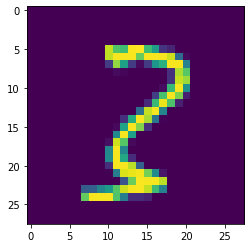

In [44]:
plt.imshow(testX[165,:].reshape(28,28))

In [45]:
len(set(err))

1086

In [46]:
for i in err:
    print(i,end=' ')
    for j in range(8):
        print(label_data[j,i],end=' ')
    print()

3 9 0 0 9 9 0 0 0 
3 9 0 0 9 9 0 0 0 
3 9 0 0 9 9 0 0 0 
3 9 0 0 9 9 0 0 0 
3 9 0 0 9 9 0 0 0 
5 7 7 7 9 7 7 7 7 
39 6 6 6 6 5 6 6 5 
39 6 6 6 6 5 6 6 5 
47 2 2 2 2 3 2 2 2 
58 2 2 2 2 4 2 2 2 
59 0 0 0 0 9 0 0 0 
83 0 0 0 0 0 0 8 8 
83 0 0 0 0 0 0 8 8 
128 8 7 8 8 4 7 7 7 
128 8 7 8 8 4 7 7 7 
128 8 7 8 8 4 7 7 7 
128 8 7 8 8 4 7 7 7 
128 8 7 8 8 4 7 7 7 
138 3 3 3 3 3 3 3 5 
165 3 7 2 2 3 2 3 3 
165 3 7 2 2 3 2 3 3 
165 3 7 2 2 3 2 3 3 
165 3 7 2 2 3 2 3 3 
217 6 6 6 6 6 6 6 5 
241 6 6 6 6 6 6 6 5 
275 3 5 5 5 5 5 5 5 
275 3 5 5 5 5 5 5 5 
275 3 5 5 5 5 5 5 5 
275 3 5 5 5 5 5 5 5 
275 3 5 5 5 5 5 5 5 
275 3 5 5 5 5 5 5 5 
275 3 5 5 5 5 5 5 5 
346 6 6 6 6 5 6 6 5 
346 6 6 6 6 5 6 6 5 
383 4 9 4 4 4 4 4 9 
383 4 9 4 4 4 4 4 9 
434 0 0 6 6 6 6 6 6 
434 0 0 6 6 6 6 6 6 
434 0 0 6 6 6 6 6 6 
434 0 0 6 6 6 6 6 6 
434 0 0 6 6 6 6 6 6 
434 0 0 6 6 6 6 6 6 
450 9 5 9 5 9 9 9 9 
450 9 5 9 5 9 9 9 9 
460 6 6 6 6 6 1 6 6 
509 2 0 2 2 2 2 2 2 
511 5 6 5 5 5 6 5 5 
511 5 6 5 5 5 6 5 5 
538 7 7 7 4

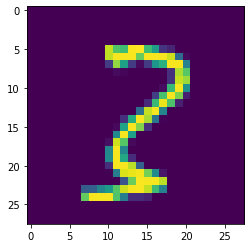

In [47]:
plt.imshow(testX[165,:].reshape(28,28))

In [48]:
stacked_pred = pd.DataFrame(label_data).mode(axis=0).iloc[0]
stacked_pred = stacked_pred.apply(lambda x:int(x))
stacked_pred = pd.DataFrame({'Label': stacked_pred})
xyz = pd.DataFrame(np.arange(1,stacked_pred.shape[0]+1),columns=['ImageId'])

stacked_pred = pd.concat([xyz,stacked_pred],axis=1)
stacked_pred.to_csv('STACK_OF_EIGHT.csv',index=False)

At Last i used stacked my different result that i had and used simple mode to decide my answer .
My submissions were completed at this point but i have good feeling about this predictions.

This marks the end of the notebook , hope it helps in your journey and hope we meet again soon .

THANK YOU FOR READING ....